In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/EDA/ObesityPrediction/obesity_data.csv')
df.head()

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,Male,173.575262,71.982051,23.891783,4,Normal weight
1,69,Male,164.127306,89.959256,33.395209,2,Obese
2,46,Female,168.072202,72.930629,25.817737,4,Overweight
3,32,Male,168.459633,84.886912,29.912247,3,Overweight
4,60,Male,183.568568,69.038945,20.487903,3,Normal weight


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1000 non-null   int64  
 1   Gender                 1000 non-null   object 
 2   Height                 1000 non-null   float64
 3   Weight                 1000 non-null   float64
 4   BMI                    1000 non-null   float64
 5   PhysicalActivityLevel  1000 non-null   int64  
 6   ObesityCategory        1000 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 54.8+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,49.857000,18.114267,18.000000,35.000000,50.000000,66.000000,79.000000
Height,1000.0,170.052417,10.309971,136.115719,163.514205,169.801665,177.353596,201.419670
Weight,1000.0,71.205769,15.509849,26.065730,61.129629,71.929072,81.133746,118.907366
BMI,1000.0,24.888317,6.193912,8.470572,20.918068,24.698647,28.732132,50.791898
PhysicalActivityLevel,1000.0,2.534000,1.116284,1.000000,2.000000,3.000000,4.000000,4.000000


<Axes: xlabel='PhysicalActivityLevel', ylabel='count'>

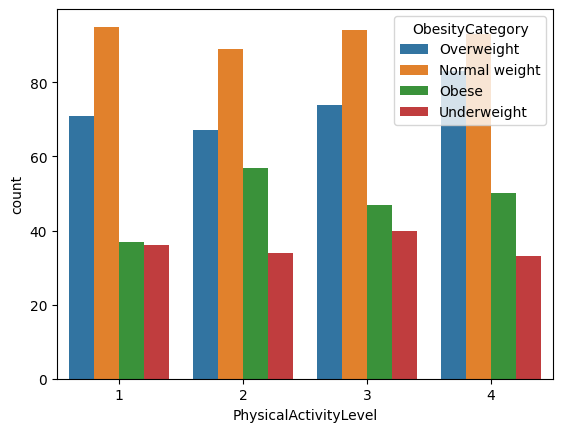

In [5]:
sns.countplot(x='PhysicalActivityLevel', hue ='ObesityCategory', data=df)

in our dataset every weight category has maximum number of members from normal weight category, in fact in physicalactlevel 4 there are more members in overweight category than any other level

In [6]:
df['BMI'].nunique()

1000

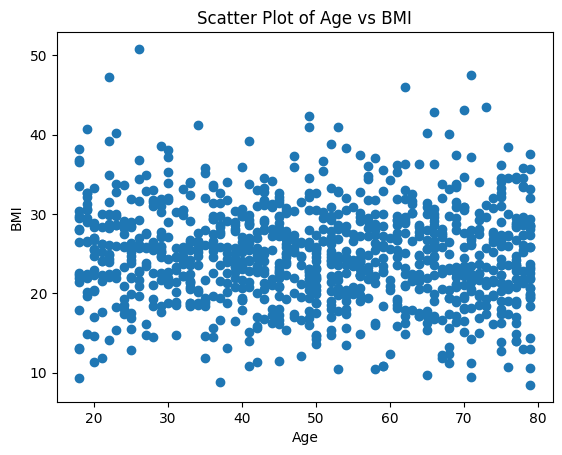

In [7]:
plt.scatter(df['Age'], df['BMI'])
plt.title('Scatter Plot of Age vs BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

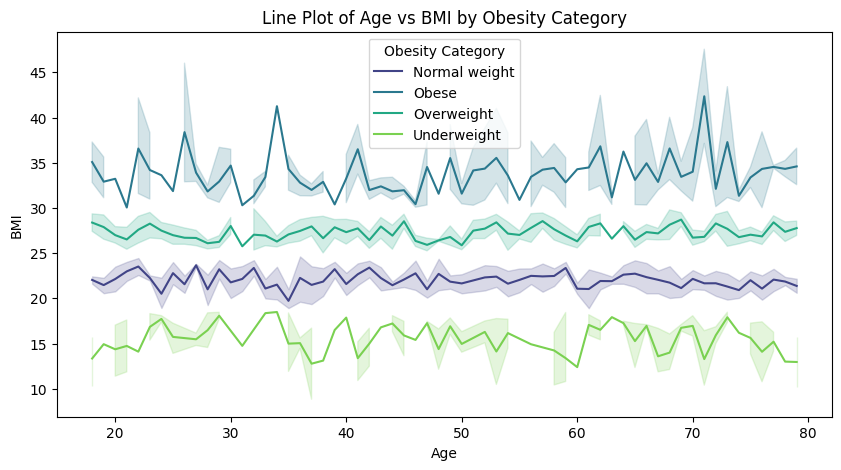

In [8]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Age', y='BMI', data=df, hue='ObesityCategory', palette='viridis')
plt.title('Line Plot of Age vs BMI by Obesity Category')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend(title='Obesity Category')
plt.show()


According to the CDC, a BMI of less than 18.5 is underweight. A BMI of 18.5 to 24.9 is considered healthy while a BMI of 30 or higher is considered obese, while a BMI of 25.0 to <30 is considered overweight, which fits perfectly with out dataset outcomes as the normal weight category members fall in that weight category given by CDC

lets now analyse some feature distributions

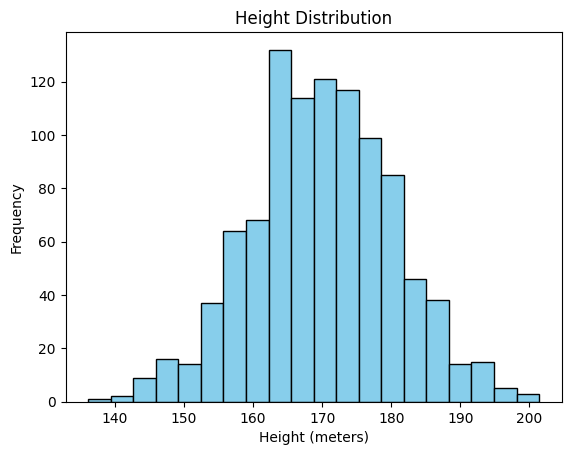

In [9]:
plt.hist(df['Height'], bins=20, color='skyblue', edgecolor='black')
plt.title('Height Distribution')
plt.xlabel('Height (meters)')
plt.ylabel('Frequency')
plt.show()

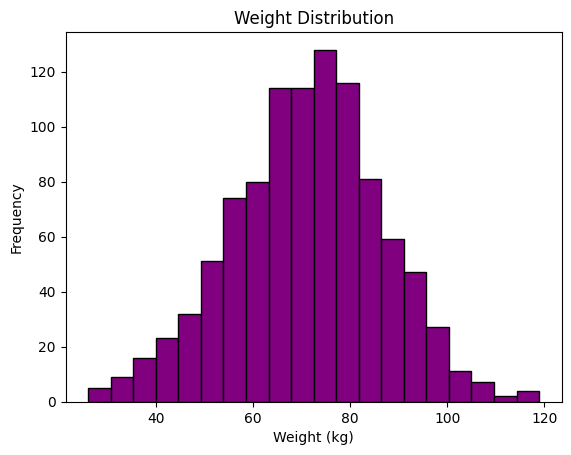

In [10]:
plt.hist(df['Weight'], bins=20, color='purple', edgecolor='black')
plt.title('Weight Distribution')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.show()


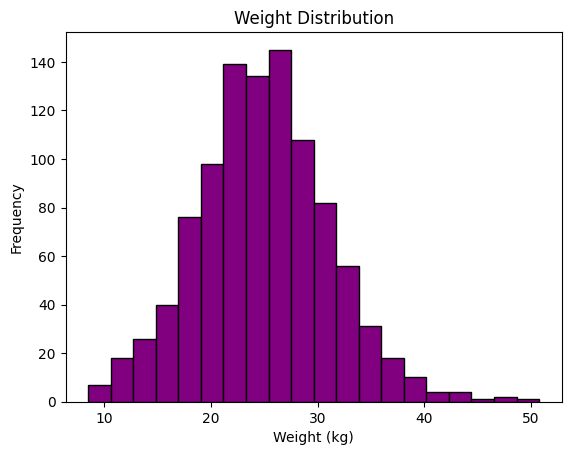

In [11]:
plt.hist(df['BMI'], bins=20, color='purple', edgecolor='black')
plt.title('Weight Distribution')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.show()


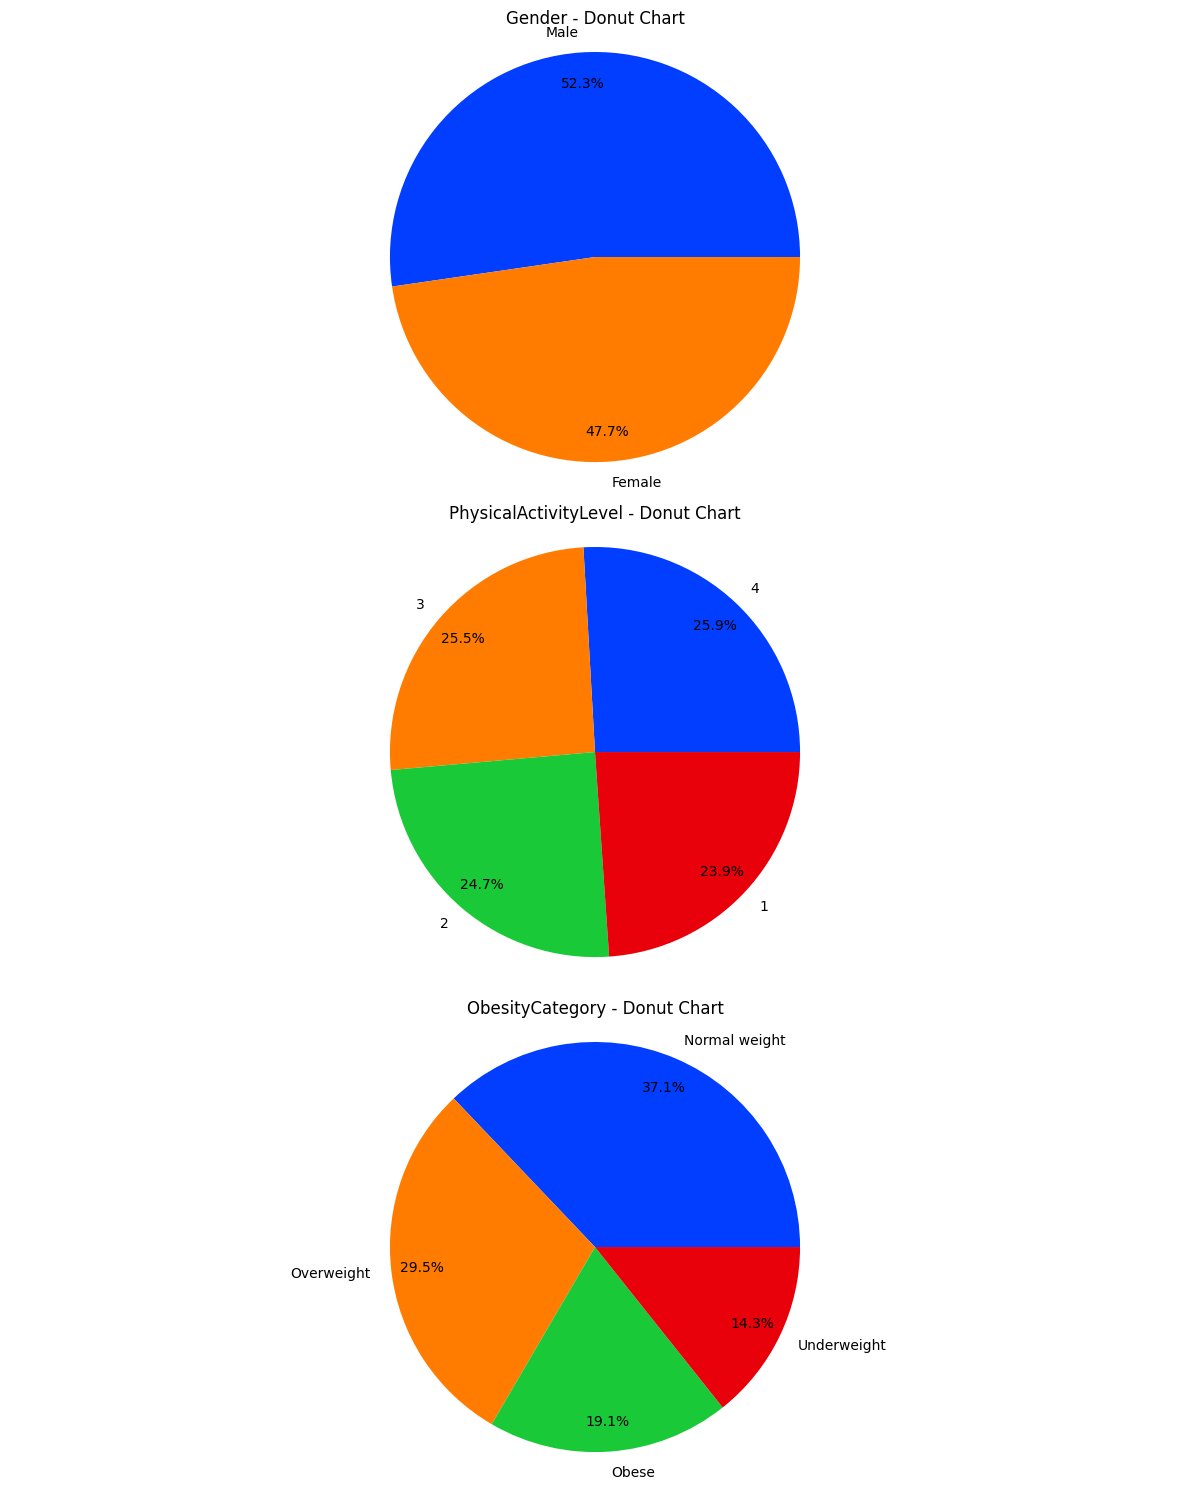

In [12]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12,15))
axes = axes.flatten()

categorical_cols = ["Gender", "PhysicalActivityLevel", "ObesityCategory"]

for i, col in enumerate(categorical_cols):
  ax = axes[i]

  #now lets make donut chart
  sizes = df[col].value_counts().values
  labels = df[col].value_counts().index
  colors = sns.color_palette("bright")[:len(sizes)]
  ax.pie(sizes, labels=labels, colors=colors, pctdistance=0.85, autopct='%1.1f%%')
  ax.axis('equal')
  ax.set_title(f"{col} - Donut Chart")
plt.tight_layout()
plt.show()


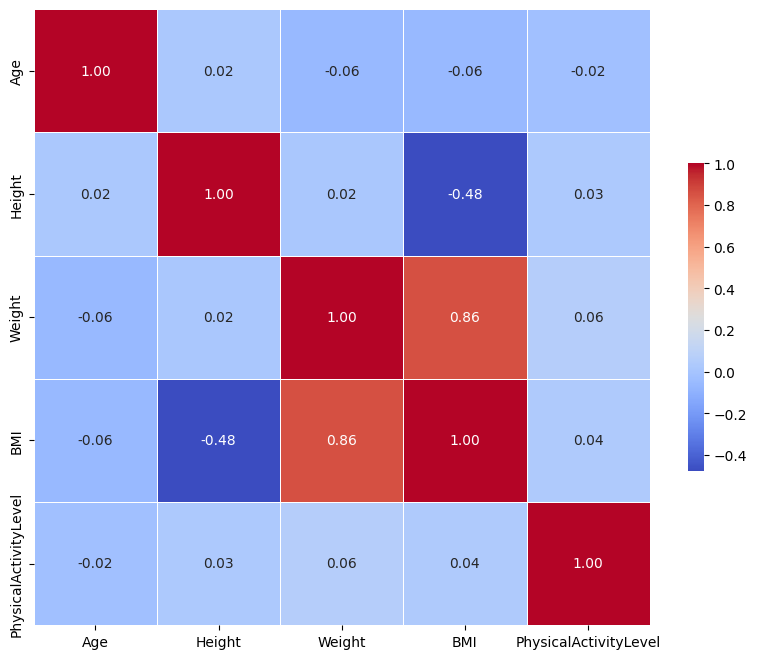

In [13]:
num_cols = df.select_dtypes(include=np.number).columns

# Calculate the correlation matrix
corr_matrix = df[num_cols].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

In [15]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 2.7 MB/s eta 0:00:00


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [17]:
df.head()

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,Male,173.575262,71.982051,23.891783,4,Normal weight
1,69,Male,164.127306,89.959256,33.395209,2,Obese
2,46,Female,168.072202,72.930629,25.817737,4,Overweight
3,32,Male,168.459633,84.886912,29.912247,3,Overweight
4,60,Male,183.568568,69.038945,20.487903,3,Normal weight


In [18]:
le = LabelEncoder()
df['Gender'] = df[['Gender']].apply(le.fit_transform)

In [19]:
X = df.drop("ObesityCategory", axis=1)
y = df['ObesityCategory']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
models = [
    RandomForestClassifier(),
    LogisticRegression(),
    KNeighborsClassifier(),
    SVC(),
    MLPClassifier(),
    CatBoostClassifier(verbose=False)
]

model_names = [model.__class__.__name__ for model in models]
model_accuracies = []

for model in models:
  model.fit(X_train_scaled, y_train)
  y_pred = model.predict(X_test_scaled)
  accuracy = accuracy_score(y_test, y_pred)
  model_accuracies.append(accuracy)
  print(f"{model.__class__.__name__} accuracy: {accuracy:.3f}")


RandomForestClassifier accuracy: 1.000
LogisticRegression accuracy: 0.965
KNeighborsClassifier accuracy: 0.860
SVC accuracy: 0.955


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier accuracy: 0.950
CatBoostClassifier accuracy: 0.980


we are getting an accuracy of 100% using random forest classifier!

In [25]:
# Train the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Get the classification report
report = classification_report(y_test, y_pred_rf, output_dict=True)

# Print the report
print("Random Forest Classification Report:")
print("=" * 40)
for label, metrics in report.items():
    if label.strip() == '':
        label = 'Overall'
    print(f"\n{label.upper()}")
    print("-" * len(label))
    if isinstance(metrics, dict):
        for metric, value in metrics.items():
            print(f"{metric.replace('_', ' ').capitalize()}: {value:.3f}")
    else:
        # Handle the case where metrics is a float (accuracy)
        print(f"Accuracy: {metrics:.3f}")
print("=" * 40)

Random Forest Classification Report:

NORMAL WEIGHT
-------------
Precision: 1.000
Recall: 1.000
F1-score: 1.000
Support: 72.000

OBESE
-----
Precision: 1.000
Recall: 0.969
F1-score: 0.984
Support: 32.000

OVERWEIGHT
----------
Precision: 0.985
Recall: 1.000
F1-score: 0.992
Support: 65.000

UNDERWEIGHT
-----------
Precision: 1.000
Recall: 1.000
F1-score: 1.000
Support: 31.000

ACCURACY
--------
Accuracy: 0.995

MACRO AVG
---------
Precision: 0.996
Recall: 0.992
F1-score: 0.994
Support: 200.000

WEIGHTED AVG
------------
Precision: 0.995
Recall: 0.995
F1-score: 0.995
Support: 200.000
